# Assignment 0: Data Exploration

An important first step to every data analysis project is to explore your data. Data exploration helps you become familiar with your data, find noise and outliers, clean your data, and prepare your data for data mining. It is important that have a good understanding of what is in your data. 

## Part 1: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'0.25.1'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [2]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [3]:
leaf_data['eccentricity'].isna().sum()

5

Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [4]:
# going to use median to avoid potential outliers
e_med = leaf_data['eccentricity'].median(skipna=True)
print(e_med)

0.51247


In [5]:
leaf_data.replace(np.nan, e_med, inplace=True)
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.51247,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Standardize the `eccentricity` column. Where `value_std = (value - mean(value)) / std(value)`. Display the head of the new data frame.

NOTE: You will want to add standardized eccentricity as a new column, rather than overwriting the existing eccentricty values with the standardized values. If you replace the original eccentricy values with the standardized ones, then happen to run the below code cell more than once, you will end up standardizing already standardized values, resulting in garbage numbers in that column. By adding a new column for the standardized eccentricity values, if the code cell is run multiple times, it will always be standardizing the original values in the eccentricty column. 

In [6]:
leaf_data['eccentricity'].describe()

count    52.000000
mean      0.562232
std       0.243030
min       0.117080
25%       0.402165
50%       0.512470
75%       0.642770
max       0.998710
Name: eccentricity, dtype: float64

In [7]:
e_std = leaf_data['eccentricity'].std()
print(e_std)
e_mean = leaf_data['eccentricity'].mean()
print(e_mean)

0.24303027889574438
0.5622321153846153


In [8]:
leaf_data = leaf_data.assign(s_eccentricity=(leaf_data['eccentricity'] - e_mean) / e_std)
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy,s_eccentricity
0,1,0.51247,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000,-0.204757
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514,1.781210
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110,-1.519819
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809,-0.165050
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660,-0.945117


Q4. Create a scatter plot between `smoothness` and standardized `eccentricity`. Place `smoothness` on the X axis.

Text(0, 0.5, 'standardized eccentricity')

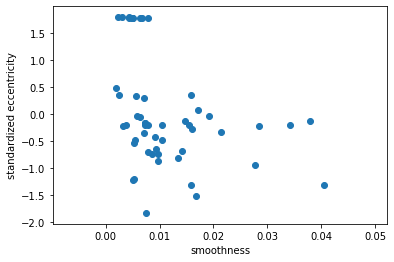

In [9]:
plt.scatter(leaf_data['smoothness'], leaf_data['s_eccentricity'])
plt.xlabel('smoothness')
plt.ylabel('standardized eccentricity')

Q5. Now plot the same scatter plot as Q4 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

Text(0, 0.5, 'standardized eccentricity')

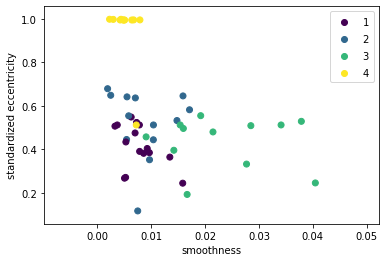

In [53]:
plt.scatter(leaf_data['smoothness'], leaf_data['eccentricity'], c=leaf_data['class'])
plt.legend(*scatter.legend_elements())
plt.xlabel('smoothness')
plt.ylabel('standardized eccentricity')

'''I can infer from the scatter plot that class 4 seemed to have highest eccentricity while having a low value for smoothness.
It can also be inferred that class 3 had the highest overall smoothness compared to the other classes while having a rather
small eccentricity. Class 2 and 3 seem to have similar smoothness but Class 2 had a overall higher eccentricity compared to
Class 3.'''

Q6. Calculate the correlation coefficient between the standardized `eccentricity` and the `smoothness` column. What does this number tell us? (Provide a short answer in the form of comments.)

In [12]:
corr_coeff = leaf_data['s_eccentricity'].corr(leaf_data['smoothness'], method='pearson')
print(corr_coeff)
'''The correlation seems to be moderate and negative. As seen by the scatter plot before, there didn't seem to be a strong
correlation based off of how it looked as the points were quite scattered.'''

-0.3634114021615545


Q7. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

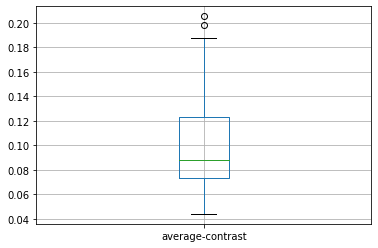

In [13]:
leaf_data.boxplot(['average-contrast'])
# There seems to be a couple outliers in the data for average-contrast as seen by the two points on the very top.

## Part 2: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [26]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
# display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q8. Show the distribution of the dataset with respect to the `education` column. Choose a plot that is suitable to show this.

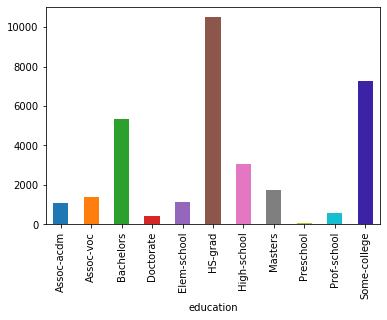

In [52]:
# since this is a categorical data type I think using a bar chart would be suitable as I can't use things such as scatter plots.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#3c23a5']
groups = adult_data.groupby('education')
groups.size().plot.bar(color=colors)

Q9.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [17]:
m_stat = adult_data.groupby('marital-status')
m_stat['hours-per-week'].describe()
'''The marital status Married-civ-spouse looks like it has the maximum average work hours with about 43.3 hours per week. 
The marital status that has the most variability looks to be Married-AF-spouse with the highest standard deviation of 19.4
hours per week.'''

,count,mean,std,min,25%,50%,75%,max
marital-status,,,,,,,,
Divorced,4443.0,41.246680,10.676632,1.0,40.0,40.0,45.0,99.0
Married-AF-spouse,23.0,41.130435,19.440596,3.0,39.0,40.0,47.0,90.0
Married-civ-spouse,14976.0,43.284856,11.905047,1.0,40.0,40.0,50.0,99.0
Married-spouse-absent,418.0,39.669856,11.767374,3.0,37.0,40.0,40.0,99.0
Never-married,10683.0,36.939998,12.432542,1.0,30.0,40.0,40.0,99.0
Separated,1025.0,39.301463,10.377534,2.0,37.0,40.0,40.0,99.0
Widowed,993.0,32.979859,14.058690,1.0,21.0,40.0,40.0,99.0


In [18]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q10. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [55]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
adult_data_copy['continent'] = adult_data_copy['native-country'].map(continent_dict)
adult_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Use matplotlib to plot a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen3.png" width=400>

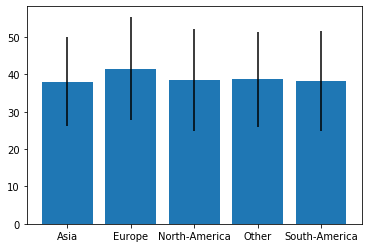

In [74]:
cont_group = adult_data_copy.groupby('continent')
error = cont_group['age'].std()
age_mean = cont_group['age'].mean()

continents = adult_data_copy['continent'].unique()
continents.sort()

cont_bar = plt.bar(np.arange(len(continents)),age_mean,yerr=error, tick_label=continents)

Q12. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [21]:
'''I would probably drop the capital-gain and capital-loss columns because very few rows actually have values in either ones and
most of them are 0's, so I would think that these columns would not be very useful. I would also probably remove the continent
column as I found that an overwhelming majority of data is found in North America, so I believe that that column would not be
very useful for predicting as well. I made some plots below to support my findings.
'''

'Explain why here (as a comment):\n\n'

In [90]:
adult_data_copy['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [80]:
adult_data_copy.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,North-America
6,49,Private,160187,High-school,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,North-America
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,North-America
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,North-America
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,North-America


In [91]:
adult_data_copy['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

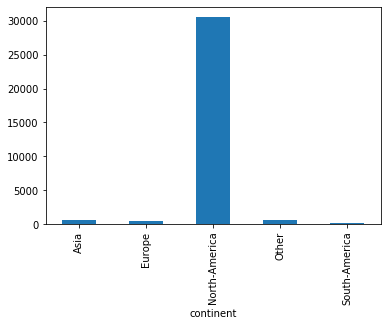

In [89]:
cont_group = adult_data_copy.groupby('continent')
cont_group.describe()
cont_group.size().plot.bar()